In [244]:
import pandas as pd
import numpy as np
import json
from polyglot.text import Text
from polyglot.downloader import downloader

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
tweets = []
for line in open('datasets/twitter/cache-0-json.gz.1.json','rb'):
    tweets.append(json.loads(line))

In [89]:
tweets=pd.read_csv('datasets/pres_tweets.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
def get_sentiment(e):
    try:
        pos=e.positive_sentiment
        neg=e.negative_sentiment
        return pos,neg
    except:
        return '',''

def map_entity(e):
    pos,neg=get_sentiment(e)
    return {'tag':e.tag,'entity':" ".join(e),'pos':pos,'neg':neg}
def get_entites(text):
    try:
        polyglot_text=Text(text)
        entities=polyglot_text.entities
        return map(map_entity,entities)
    except:
        return []
     
def map_to_data(tweet):
    user_name=tweet['user']['name']
    text=tweet['text']
    return {'text':text,'user':user_name,'entities':get_entites(text)}

In [100]:
tweets['entities']=tweets['body'].map(get_entites)

In [112]:
tweets.to_csv('datasets/with_entites.csv')

In [95]:
downloader.download('ner2.sco',download_dir='/root/polyglot_data')

[polyglot_data] Error loading ner2.sco: Package u'ner2.sco' not found
[polyglot_data]     in index


False

In [247]:
entities_count = {}

In [248]:
for row_id, tweet in tweets.iterrows():
    for ent in tweet['entities']:
        e = ent['entity']
        if e not in entities_count:
            entities_count.update({e: 1})
        else:
            entities_count[e] += 1

In [249]:
entities_count = [(k.replace("'", '').replace(':', '').replace(',', '').replace('.', '').strip().encode('ascii','ignore'), float(v)) 
                  for k, v in entities_count.iteritems() if len(k) > 2 and v > 4]

In [250]:
len(entities_count)

700

In [251]:
entities_count

[('Waterloo', 6.0),
 ('Paul', 6.0),
 ('Christie', 12.0),
 ('BET', 8.0),
 ('Arizona', 49.0),
 ('Harry Reid', 7.0),
 ('Presidential', 6.0),
 ('Ohio', 341.0),
 ('arent', 5.0),
 ('Ted Cruzs', 39.0),
 ('WHO', 5.0),
 ('John https', 61.0),
 ('Washington Post', 5.0),
 ('US', 105.0),
 ('Phoenix', 16.0),
 ('Reese', 6.0),
 ('Fox Business', 7.0),
 ('pharma', 6.0),
 ('Pfizer', 5.0),
 ('Nashua  New Hampshire', 6.0),
 ('DONALD', 5.0),
 ('Super', 10.0),
 ('Dodd', 7.0),
 ('Portland  Maine', 8.0),
 ('Carly Fiorina', 24.0),
 ('Clinton', 170.0),
 ('Keene  NH', 5.0),
 ('todays', 7.0),
 ('YOU', 5.0),
 (' Ive', 5.0),
 ('Seattle', 9.0),
 ('Charleston', 33.0),
 ('Carter', 5.0),
 ('Chicago', 42.0),
 ('TedCruz', 14.0),
 ('Mr Trump', 25.0),
 ('Grand Rapids', 6.0),
 ('Tom Brady', 8.0),
 ('Alabama', 34.0),
 ('Bernie', 314.0),
 ('Texans', 21.0),
 ('Democrat', 20.0),
 ('JohnKasichs', 7.0),
 ('Union', 6.0),
 ('United States of America', 13.0),
 ('Havana', 6.0),
 ('Colorado', 45.0),
 ('Washington', 189.0),
 ('Anderson'

In [252]:
for row_id, tweet in tweets.iterrows():
    for ent in tweet['entities']:
        if ent['entity'] not in entities:
            entities[ent['entity']].update({})

[{'entity': u'California',
  'neg': 0.82692307692307687,
  'pos': 0,
  'tag': u'I-LOC'}]

In [258]:
" ".join(tweet['entities'])

TypeError: sequence item 0: expected string, dict found

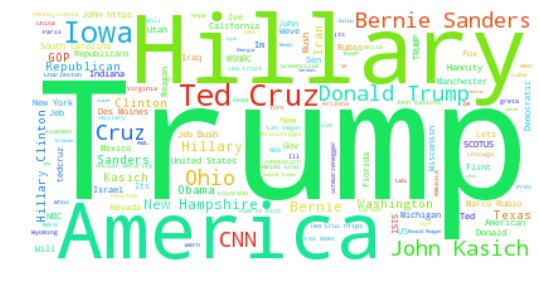

In [254]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(entities_count)
plt.figure(figsize=(9, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# def draw_wc_filtered(df, top_n=10, save=False, agg_col=u'Quantity'): 
#     df = pd.DataFrame(df.groupby(u'Group').sum()[agg_col]).sort(
#         agg_col, ascending=False).ix[:top_n].reset_index()
#     df.Group = df.Group.apply(lambda x: x.split(' - ')[1])
#     counts = [((x[1]['Group'].decode('utf-8'), x[1][agg_col])) for x in df.iterrows()]
# #     print counts
#     wordcloud = WordCloud(background_color="white").generate_from_frequencies(counts)
#     plt.figure(figsize=(9, 12))
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.show()
#     if save:
#         plt.savefig('wc/{}.png'.format(save))